In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras as keras

# Importing our  dataset and exploring it using librosa library

In [ ]:
import os
general_path = '/content/drive/MyDrive/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['country', 'hiphop', 'metal', 'rock', 'jazz', 'blues', 'reggae', 'classical', 'pop', 'disco']


In [ ]:
# File path to the audio file
file_path = f'{general_path}/genres_original/country/country.00010.wav'

# Load the audio file using librosa
y, sr = librosa.load(file_path)

# Print the audio signal 'y' and its shape
print('y:', y)
print('y shape:', y.shape)

# Print the sample rate (KHz)
print('Sample Rate (KHz):', sr)

# Verify the length of the audio in seconds
audio_length = len(y) / sr
print('Check Len of Audio (seconds):', audio_length)

y: [ 0.04135132  0.04818726  0.05679321 ... -0.05780029 -0.01217651
 -0.01144409]
y shape: (661794,)
Sample Rate (KHz): 22050
Check Len of Audio (seconds): 30.013333333333332


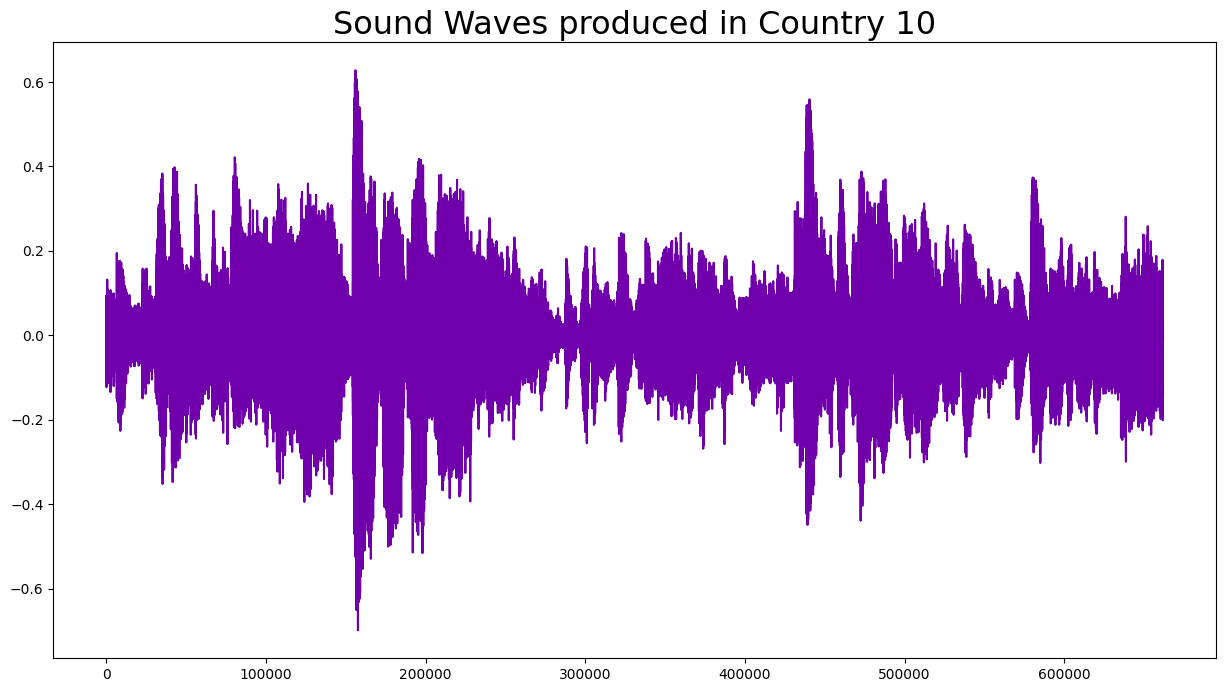

In [ ]:
# File path to the audio file
file_path = f'{general_path}/genres_original/country/country.00010.wav'

# Load the audio file using librosa
y, sr = librosa.load(file_path)

# Trim leading and trailing silence from the audio signal
audio_file, _ = librosa.effects.trim(y)

# Create a figure with custom size
plt.figure(figsize=(15, 8))

# Display the waveplot of the trimmed audio signal using matplotlib.pyplot
plt.plot(audio_file, color="#7000ab")

# Add a title to the plot
plt.title("Sound Waves produced in Country 10", fontsize=23)

# Show the plot
plt.show()

### Creating a Spectogram for the file above

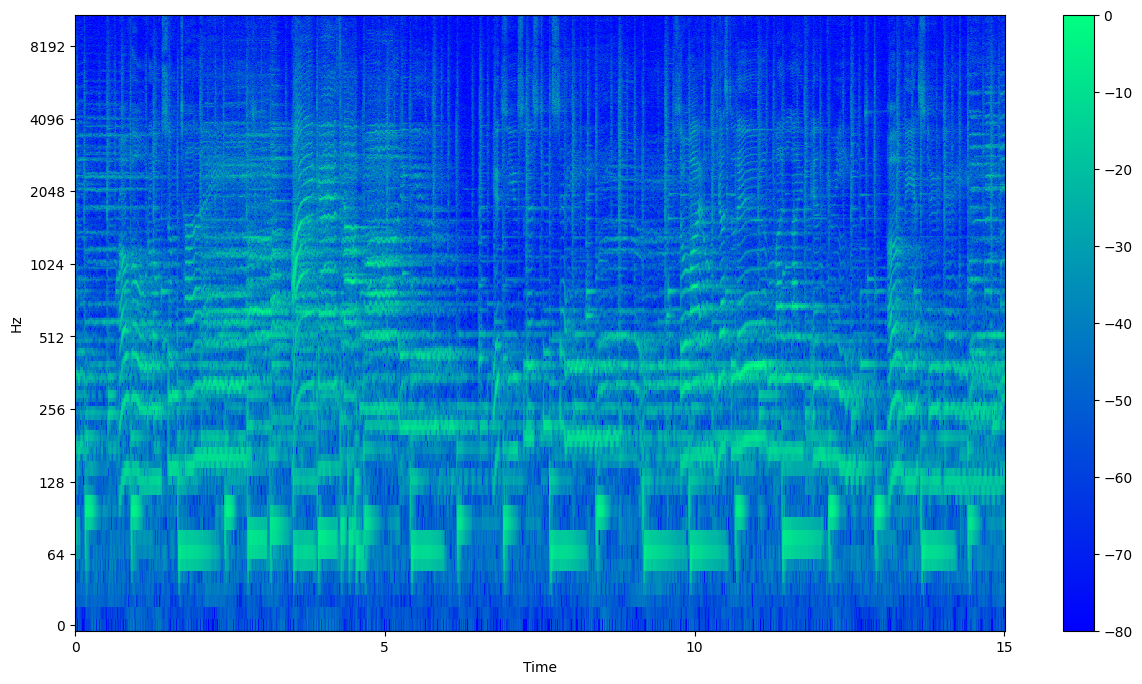

In [ ]:
# File path to the audio file
file_path = f'{general_path}/genres_original/country/country.00010.wav'

# Load the audio file using librosa
y, sr = librosa.load(file_path)

# Trim leading and trailing silence from the audio signal
audio_file, _ = librosa.effects.trim(y)

# Compute the Short-Time Fourier Transform (STFT) magnitude
D = librosa.stft(audio_file)

# Convert the amplitude spectrogram to Decibels-scaled spectrogram
DB = librosa.amplitude_to_db(D, ref=np.max)

# Setting the hop length for time-axis spacing
hop_length = 256

# Create a figure with custom size
plt.figure(figsize=(15, 8))

# Display the spectrogram
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='winter')

# Add a colorbar to the plot
plt.colorbar()

# Show the plot
plt.show()

###Chroma frequencies

Chromogram shape: (12, 166)


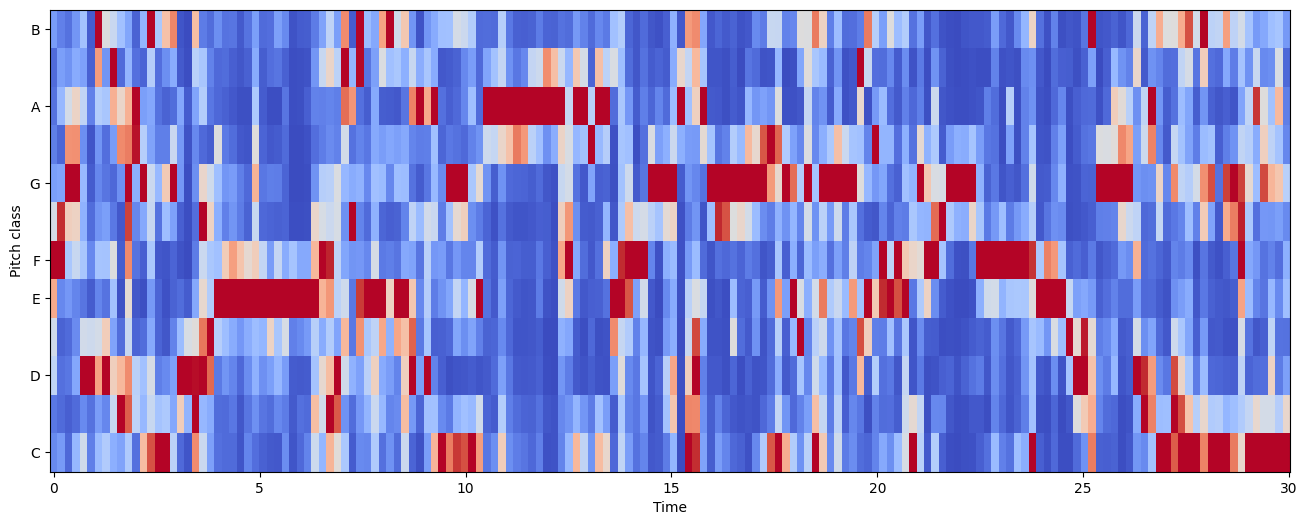

In [ ]:
# File path to the audio file
file_path = f'{general_path}/genres_original/country/country.00010.wav'

# Load the audio file using librosa
y, sr = librosa.load(file_path)

# Trim leading and trailing silence from the audio signal
audio_file, _ = librosa.effects.trim(y)

# Increase or decrease hop_length to change the granularity of the data
hop_length = 4000

# Compute the chromagram using STFT
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)

# Print the shape of the chromagram
print('Chromogram shape:', chromagram.shape)

# Create a figure with custom size
plt.figure(figsize=(16, 6))

# Display the chromagram
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Show the plot
plt.show()

# Working on the dataset to gain insights

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(f'{general_path}/features_30_sec.csv')

# Display the first few rows of the DataFrame
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


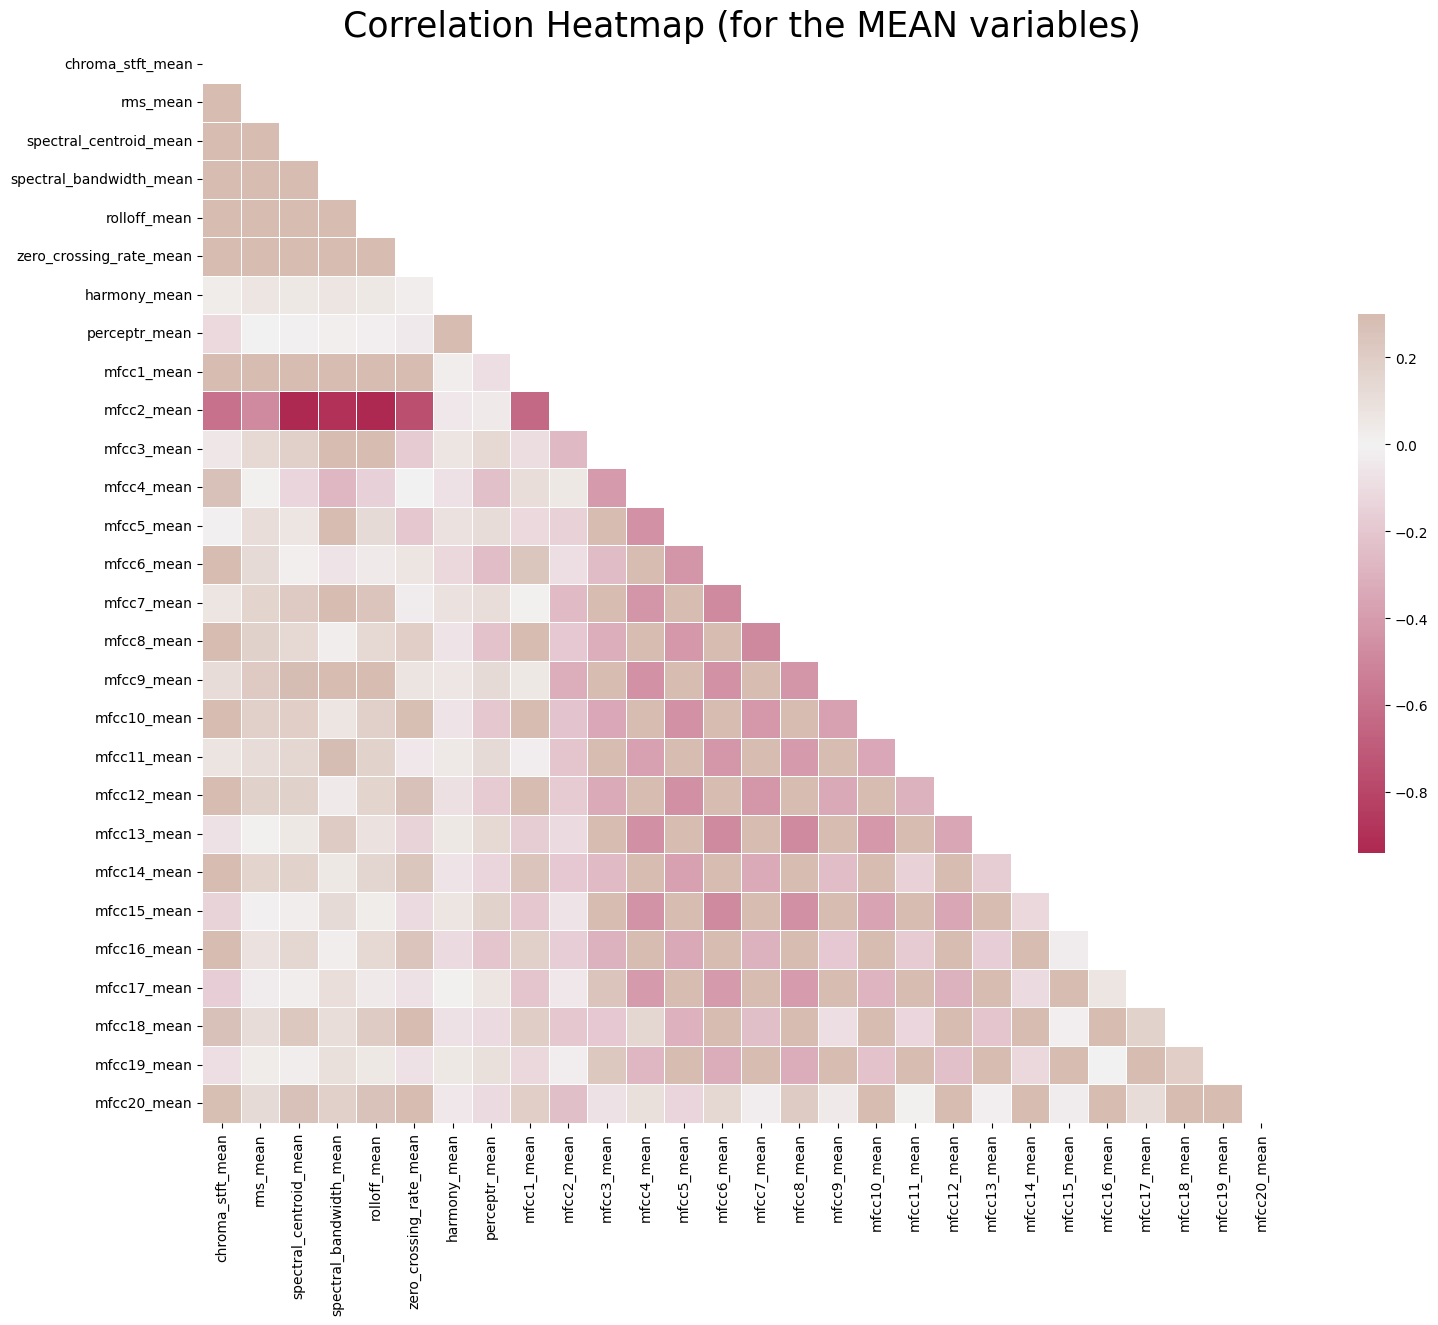

In [ ]:
# List of columns containing 'mean' in their names
spike_cols = [col for col in data.columns if 'mean' in col]

# Compute the correlation matrix for the 'mean' columns
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 14))

# Generate a custom diverging colormap for the heatmap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=80, l=40, n=5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title and adjust font sizes for ticks
plt.title('Correlation Heatmap (for the MEAN variables)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the heatmap as an image file
plt.savefig("Corr Heatmap.jpg")

# Show the plot
plt.show()

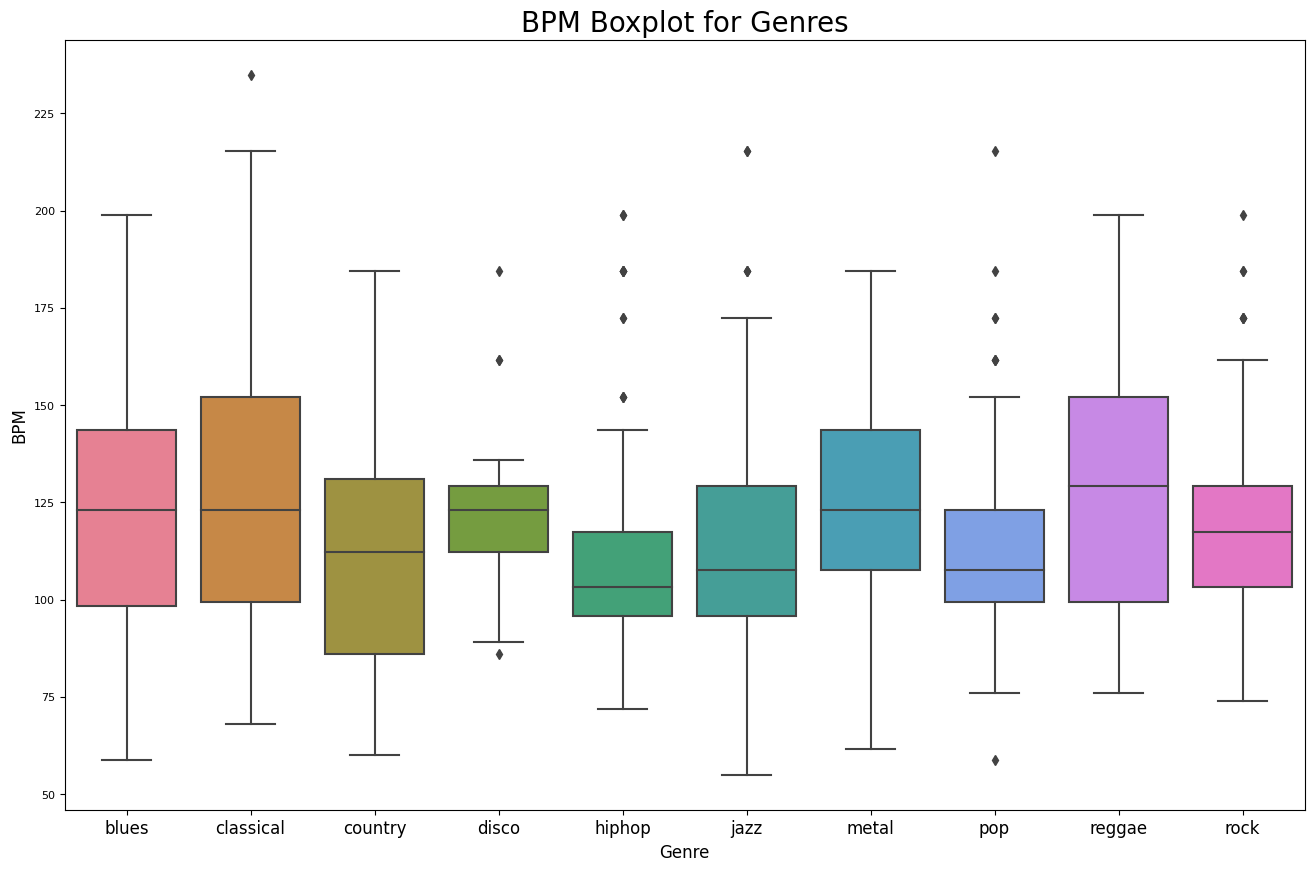

In [ ]:
# Selecting the "label" and "tempo" columns from the DataFrame
x = data[["label", "tempo"]]

# Create a matplotlib figure and axis
f, ax = plt.subplots(figsize=(16, 10))

# Create the boxplot using seaborn
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

# Customize the plot
plt.title('BPM Boxplot for Genres', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("BPM", fontsize=12)

# Save the plot as an image file
plt.savefig("BPM Boxplot.jpg")

# PreProcessing and Training

In [ ]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_


array([0.2439355 , 0.21781804])

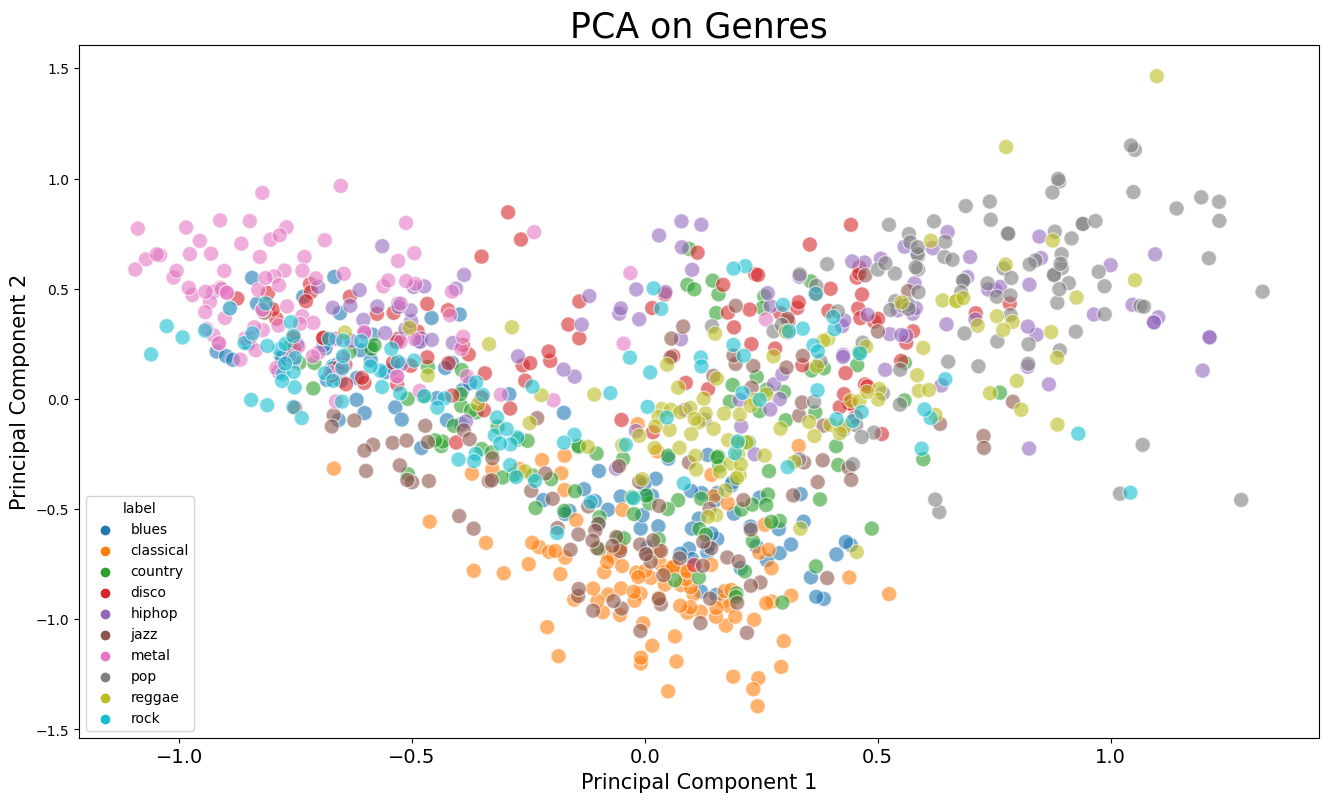

In [ ]:
# Set the size of the figure
plt.figure(figsize=(16, 9))

# Create a scatter plot using seaborn, with principal component 1 on the x-axis, principal component 2 on the y-axis,
# and color-coded points based on the 'label' column
sns.scatterplot(x="principal component 1", y="principal component 2", data=finalDf, hue="label", alpha=0.6, s=120)

# Add title and set font sizes for axes ticks and labels
plt.title('PCA on Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)

# Save the plot as an image
plt.savefig("PCA Scattert.jpg")


# Creatin and training model on 3sec data file

In [ ]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')

# Exclude the first column (index 0) from the DataFrame
data = data.iloc[:, 1:]

# Display the first few rows of the DataFrame to inspect the data
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
# Extract the 'label' column, which represents the genre variable. This will be our target variable.
y = data['label']

# Extract all columns except the 'label' column to create the feature dataset.
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####

# Get the column names of X for later use.
cols = X.columns

# Initialize a MinMaxScaler object to scale the data between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()

# Apply the MinMaxScaler to normalize (scale) the data, so all features are on the same scale.
np_scaled = min_max_scaler.fit_transform(X)

# Create a new DataFrame 'X' containing the normalized data with the original column names.
X = pd.DataFrame(np_scaled, columns=cols)

In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the feature dataset (X) and target variable (y) into training and testing sets.
# test_size=0.25 indicates that 25% of the data will be used for testing, and 75% for training.
# random_state=101 is used to ensure reproducibility of the split. It sets a random seed to get consistent results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Now you have the evaluation metrics for the Logistic Regression model
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8714971977582066
Precision: 0.8747076626998509
Recall: 0.8714971977582066
F1 Score: 0.8718313604545777
Confusion Matrix:
[[230   1   8   0   0   3   0   0   4   3]
 [  1 247   0   0   0   9   0   0   0   1]
 [  7   5 215  11   1   7   0   0  11  11]
 [  4   2   2 200   2   1   2   2   4   8]
 [  3   1   2   8 193   0   7   2  12   2]
 [  6  21   6   1   0 200   0   1   1   2]
 [  1   0   0   6   0   0 236   0   1  13]
 [  0   1   4  11   6   3   0 225   8   3]
 [  0   0   9   6   8   1   0   3 238   1]
 [  5   2  14  21   2   2   1   0   4 193]]


In [ ]:
X_train_array = X_train.values  # Convert DataFrame to NumPy array
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

In [ ]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

import tensorflow as tf
from tensorflow.keras.models import Sequential

y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model_history = trainModel(model=model, epochs=200, optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
y_pred = model.predict(X_test)  # Assuming X_test is your test data
y_pred = y_pred.argmax(axis=1)  # Convert predicted probabilities to class labels

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print(conf_matrix)


79/79 [==============================] - 0s 5ms/step
Precision: 0.9105974654135285
Recall: 0.9095276220976781
[[231   0   9   0   3   3   2   0   0   1]
 [  0 244   2   0   0  11   0   0   0   1]
 [ 10   1 230   1   0   9   0   1   3  13]
 [  0   0   4 201   6   0   1   2   5   8]
 [  1   0   3   3 209   1   3   1   6   3]
 [  0   4   2   0   0 226   0   2   1   3]
 [  3   0   0   3   1   0 240   0   1   9]
 [  0   1   4   3   4   2   0 243   3   1]
 [  2   0   4   4   2   1   0   6 241   6]
 [  1   1   9   8   3   7   1   5   2 207]]


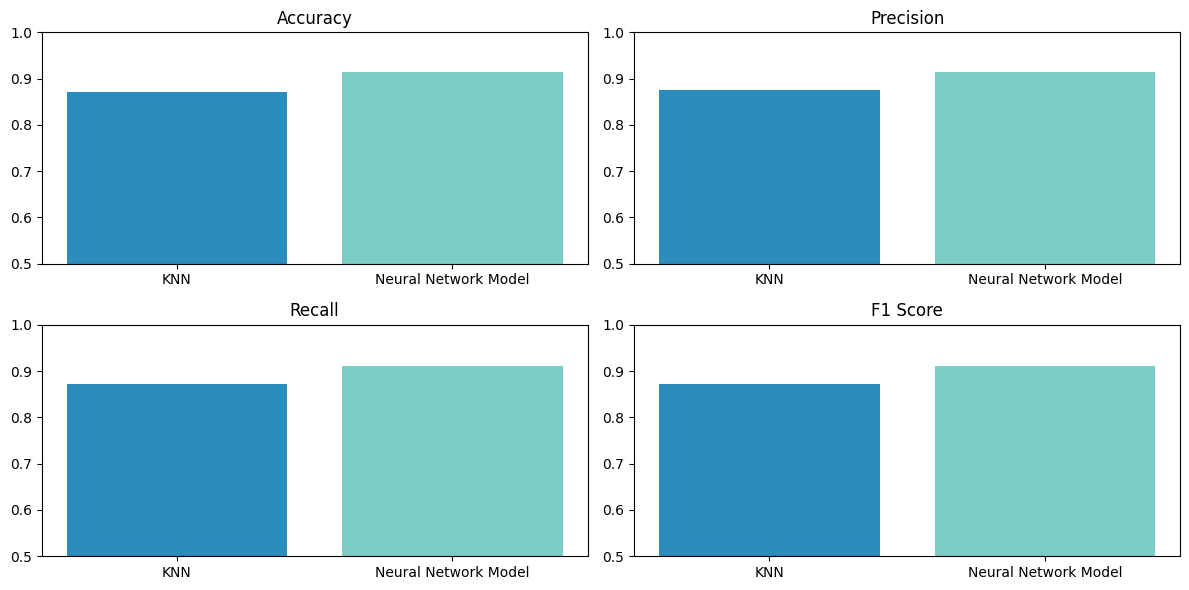

In [ ]:
# Evaluation metrics
accuracy = [0.8714,0.9151 ]
precision = [ 0.8747, 0.9133]
recall = [0.8714, 0.9115 ]
f1_score = [0.8718, 0.9117]

# Labels for models
models = ['KNN', 'Neural Network Model']

# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(221)
plt.bar(models, accuracy, color=['#2b8cbe', '#7bccc4'])
plt.title('Accuracy')
plt.ylim(0.5, 1)

# Precision
plt.subplot(222)
plt.bar(models, precision, color=['#2b8cbe', '#7bccc4'])
plt.title('Precision')
plt.ylim(0.5, 1)

# Recall
plt.subplot(223)
plt.bar(models, recall, color=['#2b8cbe', '#7bccc4'])
plt.title('Recall')
plt.ylim(0.5, 1)

# F1 Score
plt.subplot(224)
plt.bar(models, f1_score, color=['#2b8cbe', '#7bccc4'])
plt.title('F1 Score')
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()